## Problem 1: PCA

### Part 1

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy.matlib
from sklearn.preprocessing import normalize

%matplotlib inline

In [2]:
u1 = [0,0,0]
u2 = [1,1,1]
cov1 = np.multiply(np.matlib.eye(3), np.array([0.5, 0.5, 0.7]))
cov2 = np.multiply(np.matlib.eye(3), np.array([0.5, 0.5, 0.01]))
print(cov1)
print(cov2)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.7]]
[[0.5  0.   0.  ]
 [0.   0.5  0.  ]
 [0.   0.   0.01]]


In [3]:
d1 = np.random.multivariate_normal(mean=u1, cov=cov1, size=20)
d2 = np.random.multivariate_normal(mean=u2, cov=cov2, size=20)

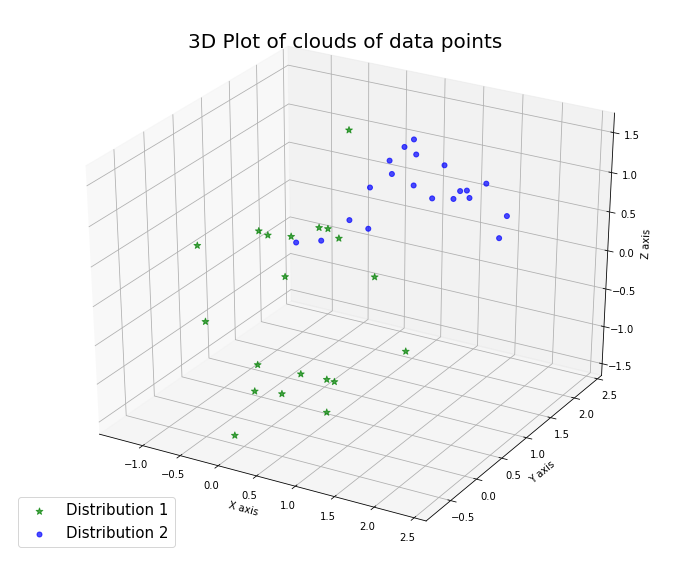

In [4]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111, projection='3d')
_ = ax1.scatter(d1[:,0], d1[:,1], d1[:,2], 
                alpha=0.7, s=50, color = 'green', marker='*', label="Distribution 1")
_ = ax1.scatter(d2[:,0], d2[:,1], d2[:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Distribution 2")

_ = ax1.set_xlabel('X axis')
_ = ax1.set_ylabel('Y axis')
_ = ax1.set_zlabel('Z axis')

_ = plt.title('3D Plot of clouds of data points', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

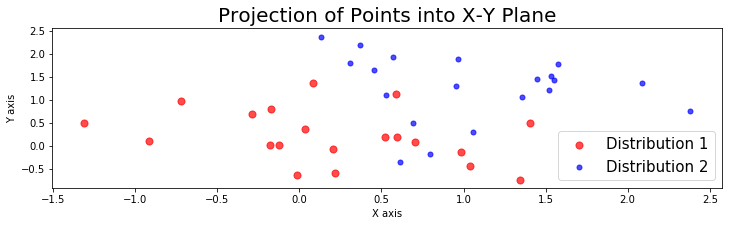

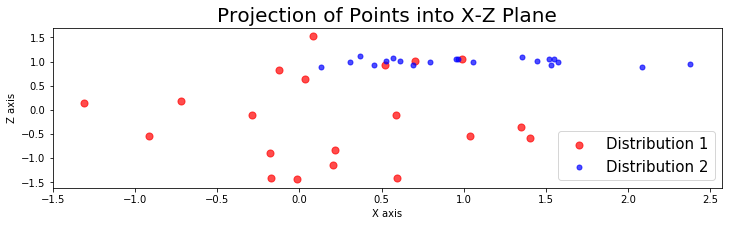

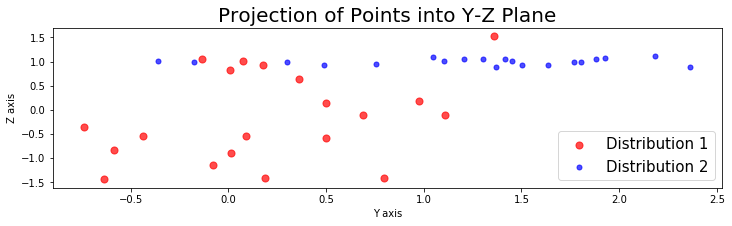

In [5]:
# Projection on XY plane

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(311)
_ = ax1.scatter(d1[:,0], d1[:,1],
                alpha=0.7, s=50, color ='red', marker='o', label="Distribution 1")
_ = ax1.scatter(d2[:,0], d2[:,1], 
                alpha=0.7, s=25, color ='blue', marker='o', label="Distribution 2")

_ = ax1.set_xlabel('X axis')
_ = ax1.set_ylabel('Y axis')

_ = plt.title('Projection of Points into X-Y Plane', FontSize=20)
_ = plt.legend(loc=4, prop={'size' : 15})


fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(312)
_ = ax1.scatter(d1[:,0], d1[:,2],
                alpha=0.7, s=50, color ='red', marker='o', label="Distribution 1")
_ = ax1.scatter(d2[:,0], d2[:,2], 
                alpha=0.7, s=25, color ='blue', marker='o', label="Distribution 2")

_ = ax1.set_xlabel('X axis')
_ = ax1.set_ylabel('Z axis')

_ = plt.title('Projection of Points into X-Z Plane', FontSize=20)
_ = plt.legend(loc=4, prop={'size' : 15})

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(313)
_ = ax1.scatter(d1[:,1], d1[:,2],
                alpha=0.7, s=50, color ='red', marker='o', label="Distribution 1")
_ = ax1.scatter(d2[:,1], d2[:,2], 
                alpha=0.7, s=25, color ='blue', marker='o', label="Distribution 2")

_ = ax1.set_xlabel('Y axis')
_ = ax1.set_ylabel('Z axis')

_ = plt.title('Projection of Points into Y-Z Plane', FontSize=20)
_ = plt.legend(loc=4, prop={'size' : 15})

## Part 2

The two distributions appear to be separated best in the X-Y plane projection. The other two projections have more overlap with respect to the X-Y projection. Aside from this, the points don't look like much.

## Part 3

In [6]:
J = np.vstack((d1, d2))
A = J[:,0]
B = J[:,1]
C = J[:,2]

uA = np.sum(A)/(A.shape[0])
uB = np.sum(B)/(B.shape[0])
uC = np.sum(C)/(C.shape[0])

mseA = (A - uA)
mseB = (B - uB)
mseC = (C - uC)

mse = [mseA, mseB, mseC]

cov = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        cov[i,j] = np.dot(mse[i], mse[j])/(mse[i].shape[0] - 1)

In [7]:
print("Covariance Matrix for d1 and d2:\n")
print(cov)

Covariance Matrix for d1 and d2:

[[0.62074261 0.12380515 0.25660837]
 [0.12380515 0.70482564 0.394692  ]
 [0.25660837 0.394692   0.75369813]]


In [8]:
print(np.cov(J.T))

[[0.62074261 0.12380515 0.25660837]
 [0.12380515 0.70482564 0.394692  ]
 [0.25660837 0.394692   0.75369813]]


## Part 4

In [9]:
evals, evecs = np.linalg.eig(cov)

print("Eigenvalues: ")
print(evals)

Eigenvalues: 
[1.24463561 0.53275816 0.30187261]


In [10]:
idx = evals.argsort()[::-1]   
evals = evals[idx]
evecs = evecs[:,idx]

In [11]:
print("Sorted eigenvalues: ")
print(evals)
print("Sorted eigenvectors: ")
print(evecs)

Sorted eigenvalues: 
[1.24463561 0.53275816 0.30187261]
Sorted eigenvectors: 
[[-0.40343113 -0.84646203 -0.34748432]
 [-0.59855441  0.53137131 -0.59948073]
 [-0.69208088  0.03386092  0.72102531]]


In [12]:
# select top two eigenvalues to give us the eigenvectors to use as a basis

v1 = evecs[:,0]
v2 = evecs[:,1]

print("Selected eigenvectors: ")
print(v1)
print(v2)

Selected eigenvectors: 
[-0.40343113 -0.59855441 -0.69208088]
[-0.84646203  0.53137131  0.03386092]


In [13]:
# center data
JcA = J[:,0] - np.mean(J[:,0])
JcB = J[:,1] - np.mean(J[:,1])
JcC = J[:,2] - np.mean(J[:,2])
Jc = np.column_stack((JcA, JcB, JcC))

In [14]:
# create projection matrix

V = np.column_stack((v1,v2))
V.shape

(3, 2)

In [15]:
Jc.shape

(40, 3)

In [16]:
proj_matrix = np.dot(Jc,V)
proj_matrix.shape

(40, 2)

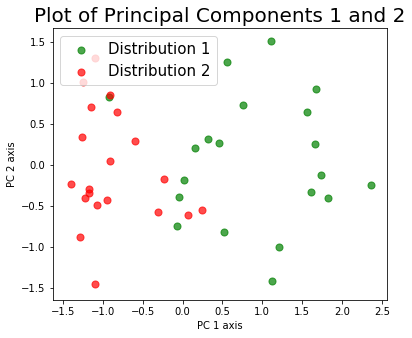

In [17]:
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(proj_matrix[:20,0], proj_matrix[:20,1],
                alpha=0.7, s=50, color = 'green', marker='o', label='Distribution 1')
_ = ax1.scatter(proj_matrix[20:,0], proj_matrix[20:,1],
                alpha=0.7, s=50, color = 'red', marker='o', label='Distribution 2')

_ = ax1.set_xlabel('PC 1 axis')
_ = ax1.set_ylabel('PC 2 axis')

_ = plt.title('Plot of Principal Components 1 and 2', FontSize=20)
_ = plt.legend(loc=2, prop={'size' : 15})

#### Did PCA make it easier to distinguish the two labels in 2D?

Yes, this is the projection that appears to separate the two labels the most.